In [3]:
using Plots, DelimitedFiles

In [5]:
adjMat = readdlm("mat.csv",',',Int8)
pos = readdlm("pos.csv",',',Float64)
rs = readdlm("rs.csv",',',Float64)

100×1 Array{Float64,2}:
 0.04420066109422858
 0.06188092553192001
 0.06188092553192001
 0.06188092553192001
 0.06188092553192001
 0.04420066109422858
 0.06188092553192001
 0.04420066109422858
 0.04420066109422858
 0.04420066109422858
 0.04420066109422858
 0.04420066109422858
 0.06188092553192001
 ⋮
 0.04420066109422858
 0.06188092553192001
 0.04420066109422858
 0.04420066109422858
 0.04420066109422858
 0.06188092553192001
 0.04420066109422858
 0.06188092553192001
 0.06188092553192001
 0.04420066109422858
 0.04420066109422858
 0.04420066109422858

In [17]:
# idea ported from https://discourse.julialang.org/t/plot-a-circle-with-a-given-radius-with-plots-jl/23295/5
function plotCircle!(r,h,k;n=100)
    ts = range(0,stop=2*pi,length=n)
    xs = [r*cos(t)+h for t in ts]
    ys = [r*sin(t)+k for t in ts]
    plot!(xs,ys,seriestype=[:shape,],lw=0.5,c=:blue,lc=:black,legend=false,fillalpha=0.2,aspect_ratio=1)
end

plotCircle! (generic function with 1 method)

In [19]:
function neighList(mat)
    list = []
    for i in 1:size(mat)[1]
        push!(list,[j for j in 1:size(mat)[2] if mat[i,j]!=0])
    end
    return list
end

neighList (generic function with 1 method)

In [22]:
neig = neighList(adjMat)

100-element Array{Any,1}:
 [10, 39, 41, 67, 86]
 [16, 29, 51, 79, 96]
 [33, 37, 52, 59, 83]
 [5, 21, 27, 42, 58]
 [4, 6, 11, 21, 24, 26, 30]
 [5, 21, 30, 55, 74]
 [17, 35, 47, 72, 92, 93]
 [12, 64, 88, 91, 99]
 [44, 55, 62, 84]
 [1, 18, 67, 91]
 [5, 42, 85]
 [8, 65, 88, 89, 91]
 [38, 43, 49, 80, 97]
 ⋮
 [12, 56, 66, 81, 95]
 [36, 60, 69, 70, 92, 94]
 [8, 10, 12, 65, 99]
 [7, 36, 70, 90, 93]
 [7, 47, 68, 70, 92]
 [14, 28, 46, 69, 76, 90]
 [16, 25, 56, 81, 89]
 [2, 33, 51, 64, 75]
 [13, 29, 43, 73, 79, 80]
 [22, 25, 81, 87]
 [8, 18, 42, 58, 91]
 [54, 62, 66, 87]

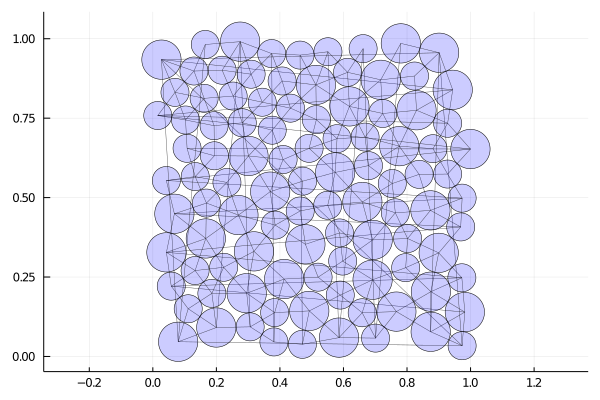

In [31]:
p = plot()
for i in 1:length(rs)
    plotCircle!(rs[i],pos[i,1],pos[i,2])
    for j in neig[i]
        plot!([pos[i,1],pos[j,1]],[pos[i,2],pos[j,2]],c=:black,lw=0.4,alpha=0.4)
    end
end
display(p)